# 05 — Translación (Traslación) en 2D

## Definición (matrices 2×2 + vector de desplazamiento)

En un marco **lineal 2D** usamos una matriz 2×2 para transformaciones lineales y un **vector de desplazamiento** para la traslación.

La traslación pura se escribe como:
$
\mathbf{p}_2 = \mathbf{T}\,\mathbf{p}_1 + \mathbf{d},
\quad
\mathbf{T}=
\begin{bmatrix}
1 & 0 \\
0 & 1
\end{bmatrix},
\quad
\mathbf{d}=
\begin{bmatrix}
t_x \\
t_y
\end{bmatrix}.
$

En componentes:
$
x_2 = x_1 + t_x, \qquad
y_2 = y_1 + t_y.
$

> Nota: en OpenCV, para aplicar sobre imágenes con `warpAffine` se usa la forma **afín 2×3**:
> $
> \mathbf{M}=
> \begin{bmatrix}
> 1 & 0 & t_x \\ 0 & 1 & t_y
> \end{bmatrix}
> $



## Implementación en OpenCV

Traslación hacia la **derecha/abajo** y hacia la **izquierda/arriba**.
Efecto **modo de borde**.


✅ Imagen cargada: (512, 512, 3) uint8


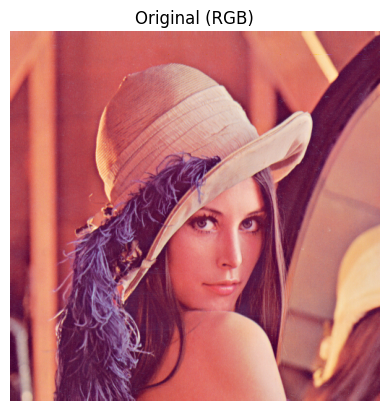

In [ ]:
# ✅ Importar librerías y cargar imagen
import cv2
import numpy as np
import matplotlib.pyplot as plt

# MISMA ruta que en los notebooks previos
img_bgr = cv2.imread(r"C:\Users\rrm21\Documents\Vision_en_Robotica\imagenes\lenna.png")  # Cambia si es necesario

if img_bgr is None:
    raise FileNotFoundError("⚠️ No se pudo cargar la imagen. Verifica la ruta.")
print("✅ Imagen cargada:", img_bgr.shape, img_bgr.dtype)

img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

plt.imshow(img_rgb); plt.title("Original (RGB)"); plt.axis("off"); plt.show()


### A) Traslación derecha/abajo

Para un desplazamiento $((t_x, t_y)$) usamos:
$
\mathbf{M} =
\begin{bmatrix}
1 & 0 & t_x\\
0 & 1 & t_y
\end{bmatrix}.
$

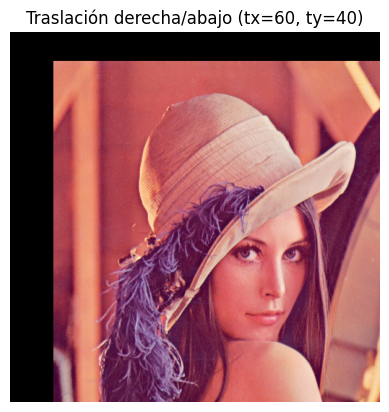

In [2]:
h, w = img_rgb.shape[:2]

tx, ty = 60, 40  # desplazar 60 px a la derecha, 40 px hacia abajo
M1 = np.float32([[1, 0, tx],
                 [0, 1, ty]])

shift_rd = cv2.warpAffine(img_rgb, M1, (w, h), flags=cv2.INTER_LINEAR, borderMode=cv2.BORDER_CONSTANT, borderValue=(0,0,0))

plt.imshow(shift_rd); plt.title(f"Traslación derecha/abajo (tx={tx}, ty={ty})"); plt.axis("off"); plt.show()


### B) Traslación izquierda/arriba

Basta con usar valores negativos en \((t_x, t_y)\).


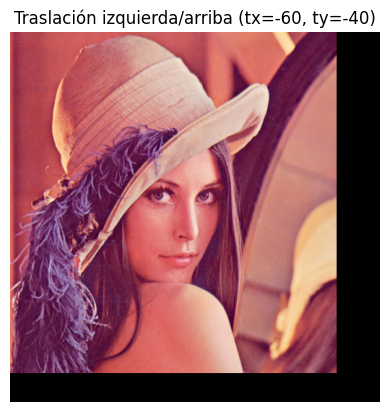

In [3]:
tx2, ty2 = -60, -40  # desplazar 60 px a la izquierda, 40 px hacia arriba
M2 = np.float32([[1, 0, tx2],
                 [0, 1, ty2]])

shift_lu = cv2.warpAffine(img_rgb, M2, (w, h), flags=cv2.INTER_LINEAR, borderMode=cv2.BORDER_CONSTANT, borderValue=(0,0,0))

plt.imshow(shift_lu); plt.title(f"Traslación izquierda/arriba (tx={tx2}, ty={ty2})"); plt.axis("off"); plt.show()


### C) Modos de borde

Al trasladar, aparecen áreas vacías. Podemos controlar cómo se rellenan con `borderMode`:
- `cv2.BORDER_CONSTANT` (valor constante, por defecto negro).
- `cv2.BORDER_REPLICATE` (replica el borde más cercano).
- `cv2.BORDER_REFLECT` (refleja el contenido).


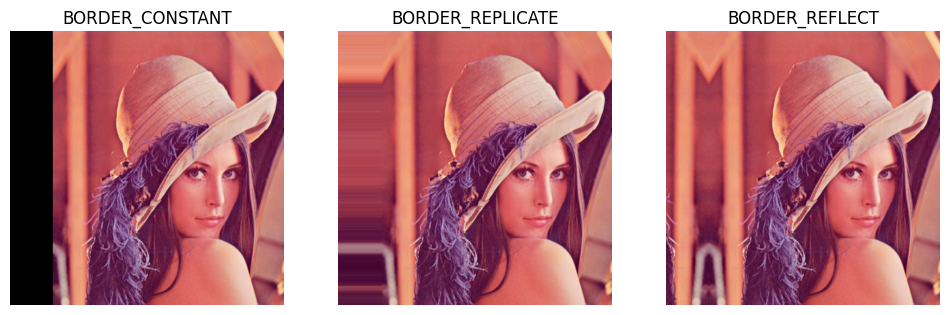

In [4]:
tx3, ty3 = 80, 0
M3 = np.float32([[1, 0, tx3],
                 [0, 1, ty3]])

shift_const = cv2.warpAffine(img_rgb, M3, (w, h), borderMode=cv2.BORDER_CONSTANT, borderValue=(0,0,0))
shift_repl  = cv2.warpAffine(img_rgb, M3, (w, h), borderMode=cv2.BORDER_REPLICATE)
shift_refl  = cv2.warpAffine(img_rgb, M3, (w, h), borderMode=cv2.BORDER_REFLECT)

import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))
plt.subplot(1,3,1); plt.imshow(shift_const); plt.title("BORDER_CONSTANT"); plt.axis("off")
plt.subplot(1,3,2); plt.imshow(shift_repl);  plt.title("BORDER_REPLICATE"); plt.axis("off")
plt.subplot(1,3,3); plt.imshow(shift_refl);  plt.title("BORDER_REFLECT");  plt.axis("off")
plt.show()


### Guardado (opcional) en la misma carpeta de la imagen original
Se agregan sufijos al nombre del archivo.


In [ ]:
import os
img_path = r"C:\Users\rrm21\Documents\Vision_en_Robotica\imagenes\lenna.png"
carpeta = os.path.dirname(img_path)
nombre, ext = os.path.splitext(os.path.basename(img_path))

cv2.imwrite(os.path.join(carpeta, f"{nombre}_shift_rd{ext}"), cv2.cvtColor(shift_rd, cv2.COLOR_RGB2BGR))
cv2.imwrite(os.path.join(carpeta, f"{nombre}_shift_lu{ext}"), cv2.cvtColor(shift_lu, cv2.COLOR_RGB2BGR))
cv2.imwrite(os.path.join(carpeta, f"{nombre}_shift_const{ext}"), cv2.cvtColor(shift_const, cv2.COLOR_RGB2BGR))
cv2.imwrite(os.path.join(carpeta, f"{nombre}_shift_repl{ext}"),  cv2.cvtColor(shift_repl,  cv2.COLOR_RGB2BGR))
cv2.imwrite(os.path.join(carpeta, f"{nombre}_shift_refl{ext}"),  cv2.cvtColor(shift_refl,  cv2.COLOR_RGB2BGR))

print("✅ Archivos guardados junto a la imagen original con sufijos _shift_*")


✅ Archivos guardados junto a la imagen original con sufijos _shift_*


## Aplicaciones en robótica

- **Registro/alineación** de imágenes consecutivas (por ejemplo, estabilización de cámara en robots móviles o drones).  
- **Mosaicos** o stitching: alinear cuadros ligeramente desplazados para crear mapas/ortomosaicos.  
- **Corrección de desalineación** en pipelines de percepción (ajustes finos tras estimación de movimiento).  
- **Data augmentation**: generar ejemplos desplazados para robustecer detectores/segmentadores.  

